In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df=pd.read_csv('./data/train.csv')
test_df=pd.read_csv('./data/test.csv')

In [ ]:
train_df.set_index(train_df.PassengerId, inplace=True)

In [4]:
train_df.drop('PassengerId',axis=1,inplace=True)

In [6]:
test_df = pd.read_csv('./data/test.csv', index_col='PassengerId')

In [7]:
train_df["Survived"]=train_df["Survived"].astype("category")

In [ ]:
train_df.info()

In [16]:
features = ["Pclass","Sex","SibSp","Parch","Embarked"]
def convert_cat(df,features):
    for feature in features:
        df[feature] = df[feature].astype("category")

convert_cat(train_df,features)
convert_cat(test_df,features)


In [17]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [18]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


In [22]:
train_df['Survived'].value_counts(normalize=True).to_frame()

,Survived
0,0.616162
1,0.383838


In [24]:
train_df['Sex'].value_counts(normalize=True).to_frame()

,Sex
male,0.647587
female,0.352413


<AxesSubplot: xlabel='Sex', ylabel='count'>

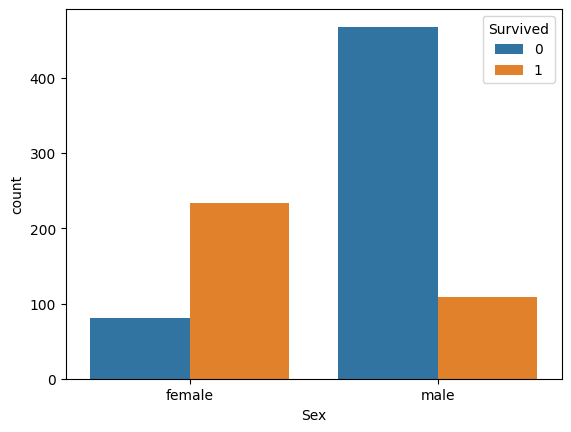

In [28]:
sns.countplot(data=train_df,hue='Survived',x="Sex")

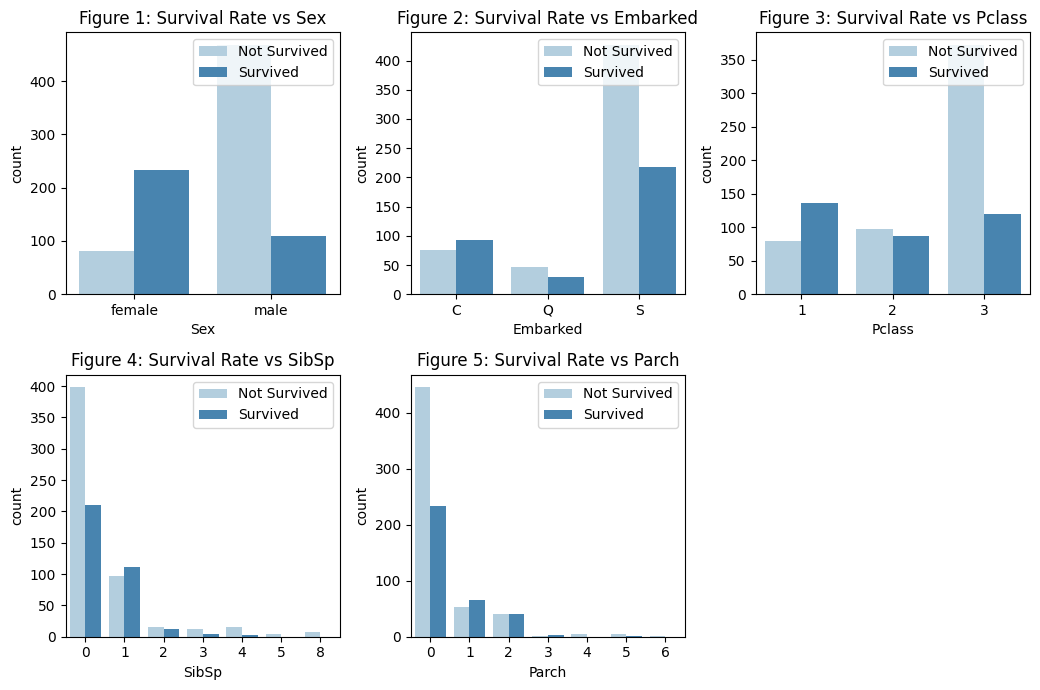

In [34]:
cols = ['Sex','Embarked','Pclass','SibSp','Parch']

n_rows=2
n_cols=3

fig,ax=plt.subplots(n_rows,n_cols,figsize=(n_cols*3.5,n_rows*3.5))


for r in range(0,n_rows):
    for c in range(0,n_cols):
        i = r*n_cols+c
        if i<len(cols):
            ax_i=ax[r,c]
            sns.countplot(data=train_df,x=cols[i],hue='Survived',palette="Blues", ax=ax_i)
            ax_i.set_title(f"Figure {i+1}: Survival Rate vs {cols[i]}")
            ax_i.legend(title='',loc='upper right', labels=['Not Survived','Survived'])


ax.flat[-1].set_visible(False)
plt.tight_layout()

<AxesSubplot: xlabel='Age', ylabel='Count'>

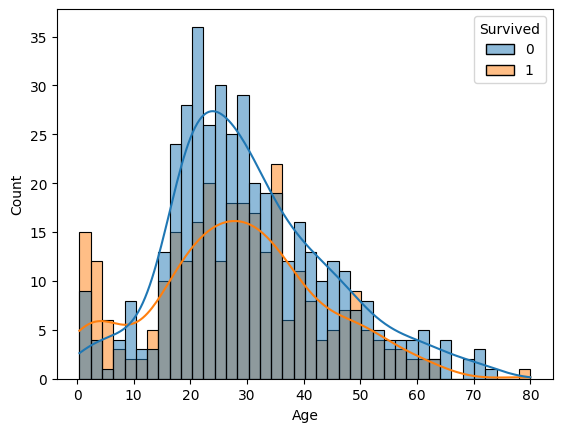

In [36]:
sns.histplot(data=train_df,x='Age',hue='Survived',bins=40,kde=True)

In [37]:
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot: xlabel='Fare', ylabel='Count'>

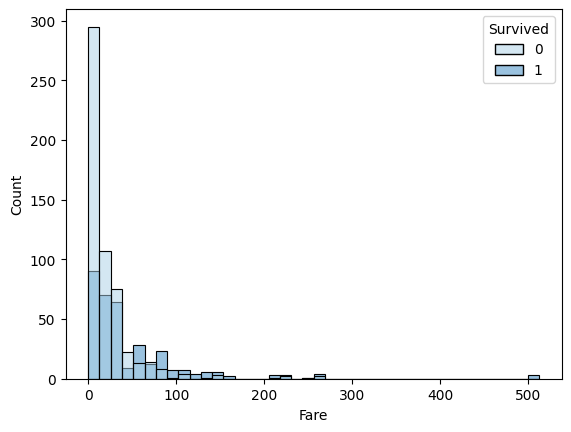

In [39]:
sns.histplot(data=train_df,x='Fare',bins=40,palette="Blues",hue='Survived')

<AxesSubplot: xlabel='Fare', ylabel='count'>

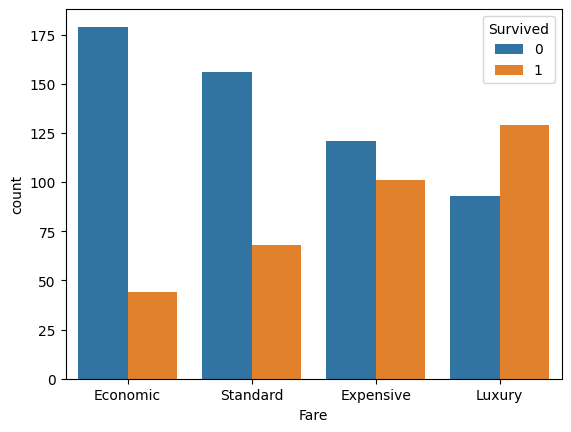

In [44]:
fare_cate=['Economic','Standard','Expensive','Luxury']
quartile_data=pd.qcut(train_df['Fare'],4,labels=fare_cate)

sns.countplot(x=quartile_data,hue=train_df['Survived'])

In [45]:
import re

In [70]:
def extract_title(name):
    p=re.compile(r",([\w\s]+)\.")
    return p.search(name).groups(1)[0].strip()

train_df['Title']=train_df['Name'].apply(lambda name: extract_title(name))
test_df['Title']=test_df['Name'].apply(lambda name: extract_title(name))
train_df['Title'].value_counts()
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

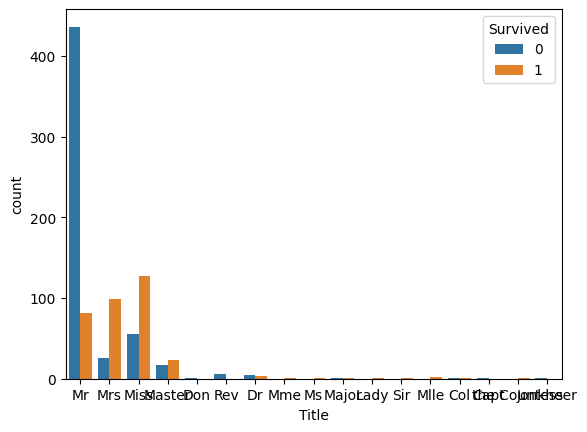

In [68]:
sns.countplot(data=train_df, x='Title',hue='Survived');

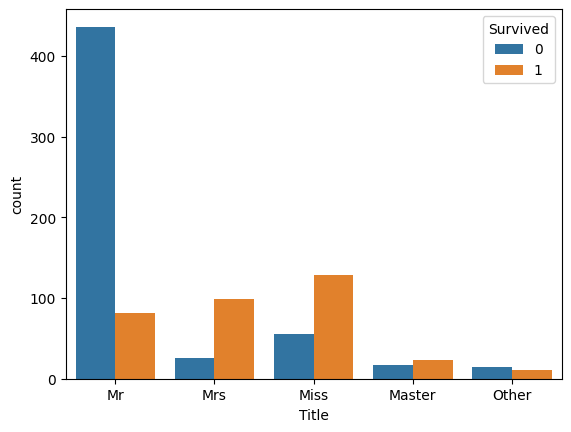

In [71]:
def group_title(title):
    if title in ['Mr','Mrs','Miss','Master']:
        return title
    elif title == 'Ms':
        return "Miss"
    else:
        return "Other"

train_df["Title"]=train_df['Title'].apply(lambda title: group_title(title))
test_df["Title"]=test_df['Title'].apply(lambda title: group_title(title))

sns.countplot(data=train_df,x='Title',hue='Survived');

In [72]:
train_df['Family_Size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1
test_df['Family_Size'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1

In [73]:
train_df['Family_Cat']=pd.cut(train_df['Family_Size'], bins=[0,1,4,6,20], labels=['Solo', 'Small', 'Medium','Large']) # (0,1], (1,4], (4,6], (6,20]
test_df['Family_Cat']=pd.cut(test_df['Family_Size'], bins=[0,1,4,6,20], labels=['Solo', 'Small', 'Medium','Large']) # (0,1], (1,4], (4,6], (6,20]

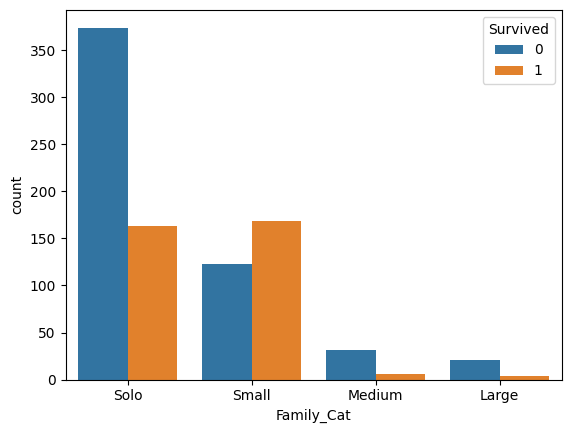

In [74]:
sns.countplot(data=train_df, x='Family_Cat', hue='Survived');


In [75]:
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']
feature_cols = num_features + cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']


In [76]:
def display_missing(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f"{col} has {missing_count*100/n_rows:.2f}% missing values.")
            
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

Age has 19.87% missing values.
Embarked has 0.22% missing values.
Age has 20.57% missing values.
Fare has 0.24% missing values.


In [79]:
age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass']).median()['Age'];


C:\Users\prodr\AppData\Local\Temp\ipykernel_9500\3218221636.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass']).median()['Age'];


In [80]:
train_df['Age']=train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()));
test_df['Age']=test_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()));

C:\Users\prodr\AppData\Local\Temp\ipykernel_9500\2611455682.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  train_df['Age']=train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()));
C:\Users\prodr\AppData\Local\Temp\ipykernel_9500\2611455682.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupb

In [81]:

X = train_df[feature_cols]
y = train_df['Survived']

In [ ]:
X_test = test_df[feature_cols]